In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
# Loading in the dataset
data= pd.read_csv('gender_classification_v7.csv')
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


## Exploratory Data Analysis

In [3]:
# decriptive statistics
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [4]:
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


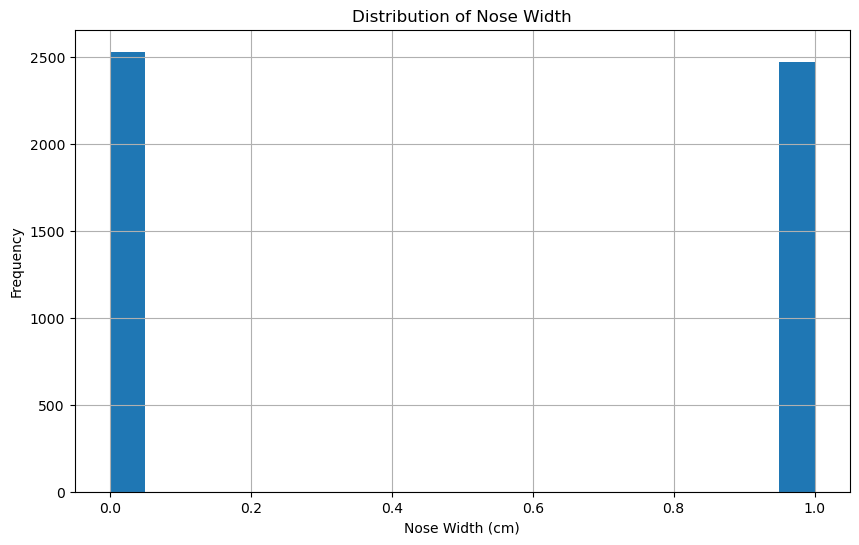

In [5]:
plt.figure(figsize=(10, 6))
data['nose_wide'].hist(bins = 20)
plt.xlabel('Nose Width (cm)')
plt.ylabel('Frequency')
plt.title('Distribution of Nose Width')
plt.show();

In [6]:
data['nose_wide'].unique()

array([1, 0], dtype=int64)

In [7]:
data['nose_long'].unique()

array([0, 1], dtype=int64)

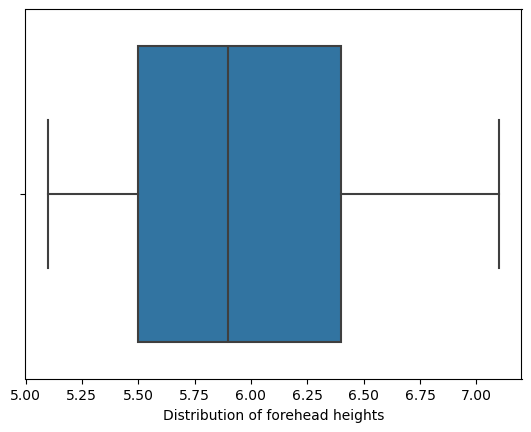

In [8]:
sns.boxplot(data = data, x = 'forehead_height_cm')
plt.xlabel('Distribution of forehead heights')
plt.show()

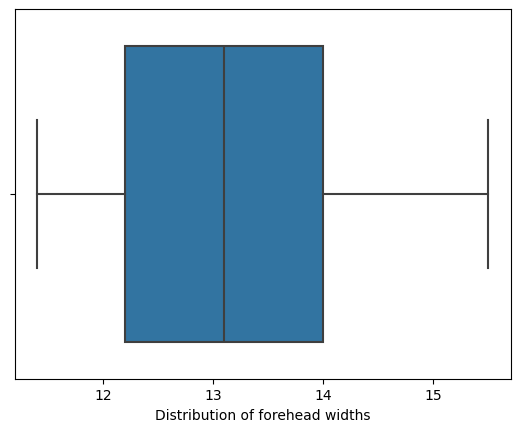

In [9]:
sns.boxplot(data = data, x = 'forehead_width_cm')
plt.xlabel('Distribution of forehead widths')
plt.show()

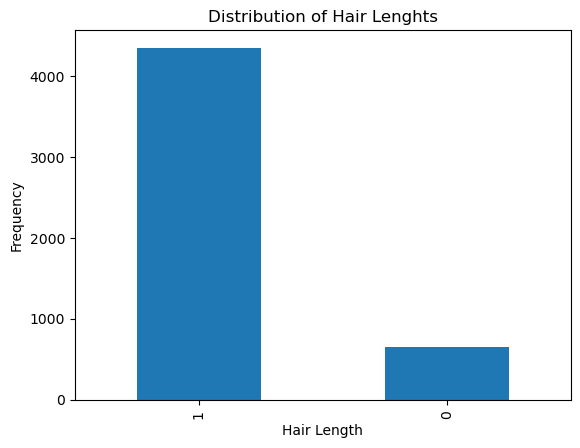

In [10]:
data['long_hair'].value_counts().plot(kind='bar')
plt.xlabel('Hair Length')
plt.ylabel('Frequency')
plt.title('Distribution of Hair Lenghts')
plt.show();

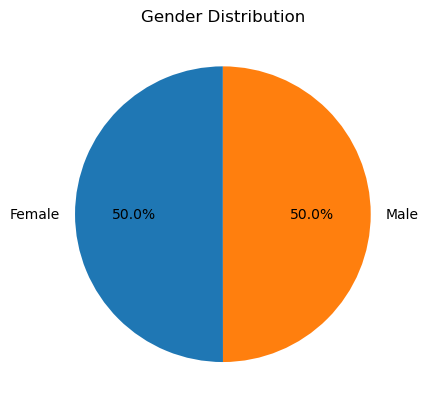

In [11]:
data['gender'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.ylabel('')
plt.show();

In [12]:
label_encoder = LabelEncoder()
data['gender_encoded'] = label_encoder.fit_transform(data['gender']) 

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
 8   gender_encoded             5001 non-null   int32  
dtypes: float64(2), int32(1), int64(5), object(1)
memory usage: 332.2+ KB


In [14]:
data.drop(columns = ['gender'], inplace = True)

In [15]:
correlation_matrix = data.corr()

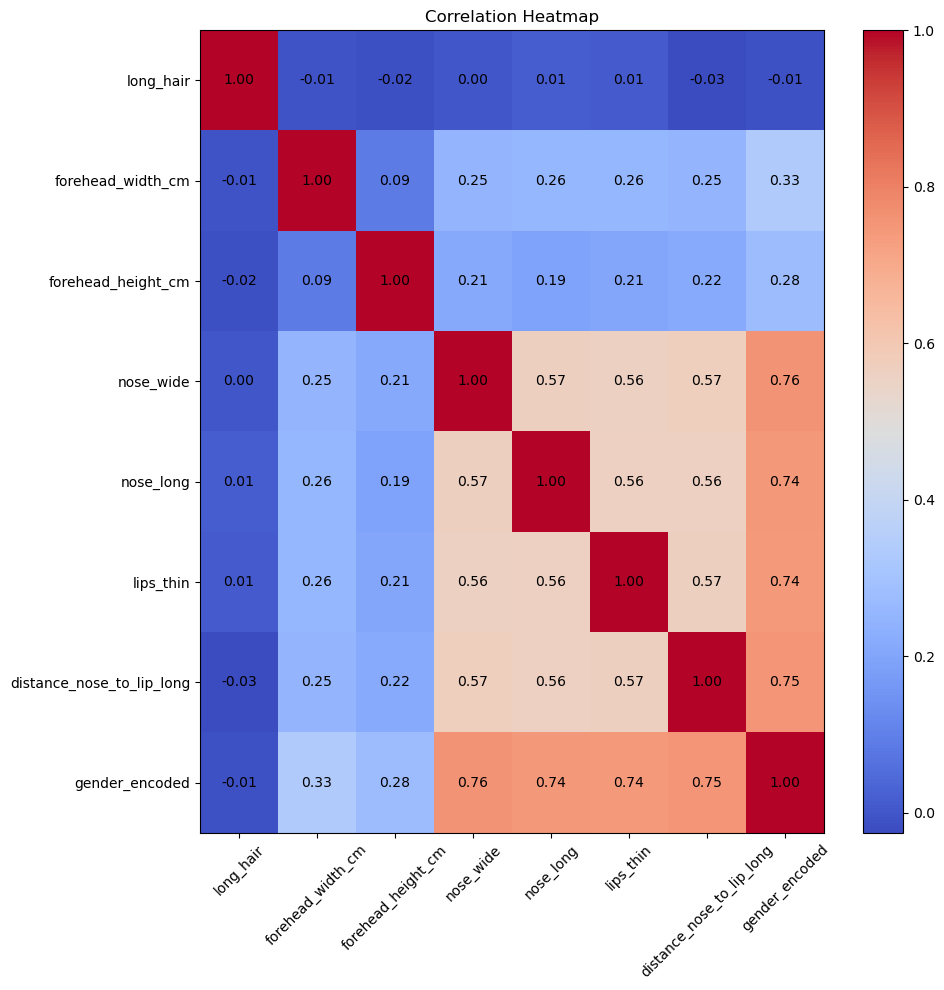

In [16]:
plt.figure(figsize=(10, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()

# Add the labels for x and y axes
plt.xticks(np.arange(len(data.columns)), data.columns, rotation=45)
plt.yticks(np.arange(len(data.columns)), data.columns)

plt.title('Correlation Heatmap')

# Add the correlation values as text in the heatmap
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

# Show the plot
plt.tight_layout()
plt.show()

## Feature Engineering

In [17]:
X = data.drop(columns = ['gender_encoded'])
y = data['gender_encoded']

print(X.shape, y.shape)

(5001, 7) (5001,)


In [18]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## Model Selection and Evaluation

### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [20]:
lm = LogisticRegression()

In [21]:
lm.fit(X_train, y_train)

LogisticRegression()

In [22]:
pred_lm = lm.predict(X_test)

In [23]:
from sklearn.metrics import classification_report

In [24]:
print('Classification Report')
print(classification_report(y_test, pred_lm, target_names=['0: Male', '1: Female']))

Classification Report
              precision    recall  f1-score   support

     0: Male       0.97      0.98      0.97       492
   1: Female       0.98      0.97      0.97       509

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



In [25]:
labels = ['0: Male', '1: Female']

pd.DataFrame(data=confusion_matrix(y_test, pred_lm), index=labels, columns=labels)

,0: Male,1: Female
0: Male,480,12
1: Female,14,495


### Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
tree = DecisionTreeClassifier(random_state=42)

In [28]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [29]:
pred_tree = tree.predict(X_test)

In [30]:
print('Decision Tree Classification Report')
print(classification_report(y_test, pred_tree, target_names=['0: Male', '1: Female']))

Decision Tree Classification Report
              precision    recall  f1-score   support

     0: Male       0.97      0.96      0.97       492
   1: Female       0.96      0.97      0.97       509

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



In [31]:
labels = ['0: Male', '1: Female']

pd.DataFrame(data=confusion_matrix(y_test, pred_tree), index=labels, columns=labels)

,0: Male,1: Female
0: Male,474,18
1: Female,16,493


### Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
pred_forest = forest.predict(X_test)

In [35]:
labels = ['0: Male', '1: Female']

pd.DataFrame(data=confusion_matrix(y_test, pred_forest), index=labels, columns=labels)

,0: Male,1: Female
0: Male,475,17
1: Female,13,496


In [36]:
print('Random Forest Classification Report')
print(classification_report(y_test, pred_forest, target_names=['0: Male', '1: Female']))

Random Forest Classification Report
              precision    recall  f1-score   support

     0: Male       0.97      0.97      0.97       492
   1: Female       0.97      0.97      0.97       509

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



## Conclusion

In this report, we explored various machine learning models for gender classification, aiming to identify the most accurate and reliable approach. After conducting a thorough analysis, our findings demonstrated that logistic regression provided the best predictive performance among the models evaluated.

The logistic regression model effectively handled the dataset, showcasing a high level of accuracy and robustness in distinguishing between genders. Its simplicity, interpretability, and ability to manage binary classification tasks made it the most suitable choice for this study. Moreover, the model's coefficients provided valuable insights into feature importance, allowing for a clearer understanding of the factors influencing gender prediction.